<a href="https://colab.research.google.com/github/skilove13/NLP-Specialization-Cousera/blob/main/C1_W2_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 2: Naive Bayes**

Welcome to week two of this specialization. You will learn about Naive Bayes. Concretely, you will be using Naive Bayes for sentiment analysis on tweets. Given a tweet, you will decide if it has a positive sentiment or a negative one. Specifically you will:

-Train a naive bayes model on a sentiment analysis task

-Test using your model

-Compute ratios of positive words to negative words

-Do some error analysis

-Predict on your own tweet

You may already be familiar with Naive Bayes and its justification in terms of conditional probabilities and independence.

In this week's lectures and assignments we used the ratio of probabilities between positive and negative sentiments.
This approach gives us simpler formulas for these 2-way classification tasks.
Load the cell below to import some packages. You may want to browse the documentation of unfamiliar libraries and functions.

In [1]:
#from utils 
import re
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

import numpy as np # Library for linear algebra and math utils


def process_tweet(tweet):
    '''
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    '''
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
            word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean


def test_lookup(func):
    freqs = {('sad', 0): 4,
             ('happy', 1): 12,
             ('oppressed', 0): 7}
    word = 'happy'
    label = 1
    if func(freqs, word, label) == 12:
        return 'SUCCESS!!'
    return 'Failed Sanity Check!'

In [4]:
import pdb
from nltk.corpus import stopwords, twitter_samples
import numpy as np 
import pandas as pd
import nltk
import string
from nltk.tokenize import TweetTokenizer
from os import getcwd 

#If you are running this notebook in your local computer, don't forget to download the twitter samples and stopwords from nltk.
nltk.download('stopwords')
nltk.download('twitter_samples')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [9]:
!pwd

# get the sets of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

#split the data into two pieces, one for training and one for testing (validation set)
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg 
test_x = test_pos + test_neg 

# avoid assumptions about the length of all_positive_tweets
train_y = np.append(np.ones(len(train_pos)), np.zeros(len(train_neg)))
test_y = np.append(np.ones(len(test_pos)), np.zeros(len(test_neg)))


/content


**Part 1: Process the Data**

For any machine learning project, once you've gathered the data, the first step is to process it to make useful inputs to your model.

Remove noise: You will first want to remove noise from your data -- that is, remove words that don't tell you much about the content. These include all common words like 'I, you, are, is, etc...' that would not give us enough information on the sentiment.
We'll also remove stock market tickers, retweet symbols, hyperlinks, and hashtags because they can not tell you a lot of information on the sentiment.
You also want to remove all the punctuation from a tweet. The reason for doing this is because we want to treat words with or without the punctuation as the same word, instead of treating "happy", "happy?", "happy!", "happy," and "happy." as different words.
Finally you want to use stemming to only keep track of one variation of each word. In other words, we'll treat "motivation", "motivated", and "motivate" similarly by grouping them within the same stem of "motiv-".
We have given you the function process_tweet() that does this for you.

In [10]:
custom_tweet = "RT @Twitter @chapagain Hello There! Have a great day. :) #good #morning http://chapagain.com.np"

#print cleaned tweet 
print(process_tweet(custom_tweet))

['hello', 'great', 'day', ':)', 'good', 'morn']


**Part 1.1 Implementing your helper functions**

To help train your naive bayes model, you will need to build a dictionary where the keys are a (word, label) tuple and the values are the corresponding frequency. Note that the labels we'll use here are 1 for positive and 0 for negative.

You will also implement a lookup() helper function that takes in the freqs dictionary, a word, and a label (1 or 0) and returns the number of times that word and label tuple appears in the collection of tweets.

For example: given a list of tweets ["i am rather excited", "you are rather happy"] and the label 1, the function will return a dictionary that contains the following key-value pairs:

{ ("rather", 1): 2 ("happi", 1) : 1 ("excit", 1) : 1 }

Notice how for each word in the given string, the same label 1 is assigned to each word.
Notice how the words "i" and "am" are not saved, since it was removed by process_tweet because it is a stopword.
Notice how the word "rather" appears twice in the list of tweets, and so its count value is 2.

Instructions
Create a function count_tweets() that takes a list of tweets as input, cleans all of them, and returns a dictionary.

-The key in the dictionary is a tuple containing the stemmed word and its class label, e.g. ("happi",1).

-The value the number of times this word appears in the given collection of tweets (an integer).

**Hints**

-Please use the `process_tweet` function that was imported above, and then store the words in their respective dictionaries and sets.

-You may find it useful to use the `zip` function to match each element in `tweets` with each element in `ys`.

-Remember to check if the key in the dictionary exists before adding that key to the dictionary, or incrementing its value.

-Assume that the `result` dictionary that is input will contain clean key-value pairs (you can assume that the values will be integers that can be incremented). It is good practice to check the datatype before incrementing the value, but it's not required here.

In [11]:
# UNQ_C1 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)

def count_tweets(result, tweets, ys) : 
    '''
    Input:
        result: a dictionary that will be used to map each pair to its frequency
        tweets: a list of tweets
        ys: a list corresponding to the sentiment of each tweet (either 0 or 1)
    Output:
        result: a dictionary mapping each pair to its frequency
    '''
     ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    for y, tweet in zip(ys, tweets):
        for word in process_tweet(tweet):
            # define the key, which is the word and label tuple
            pair = (word,y)

            # if the key exists in the dictionary, increment the count
            if pair in result:
                result[pair] += 1

            # else, if the key is new, add it to the dictionary and set the count to 1
            else:
                result[pair] = 1
    ### END CODE HERE ###

    return result

In [12]:
# Testing your function 

result = {}
tweets = ['i am happy', 'i am tricked', 'i am sad', 'i am tired', 'i am tired']
ys = [1, 0, 0, 0, 0]
count_tweets(result, tweets, ys)

{('happi', 1): 1, ('sad', 0): 1, ('tire', 0): 2, ('trick', 0): 1}

**Part 2: Train your model using Naive Bayes**

Naive bayes is an algorithm that could be used for sentiment analysis. It takes a short time to train and also has a short prediction time.

**So how do you train a Naive Bayes classifier?**

The first part of training a naive bayes classifier is to identify the number of classes that you have.
You will create a probability for each class. 

-P(Dpos)is the probability that the document is positive. 

-P(Dneg)is the probability that the document is negative. 

Use the formulas as follows and store the values in a dictionary:

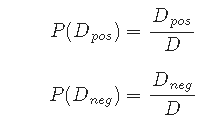

Where  is the total number of documents, or tweets in this case, 
 Dpos is the total number of positive tweets and 
 Dneg is the total number of negative tweets.

**Prior and Logprior**

The prior probability represents the underlying probability in the target population that a tweet is positive versus negative. In other words, if we had no specific information and blindly picked a tweet out of the population set, what is the probability that it will be positive versus that it will be negative? That is the "prior".

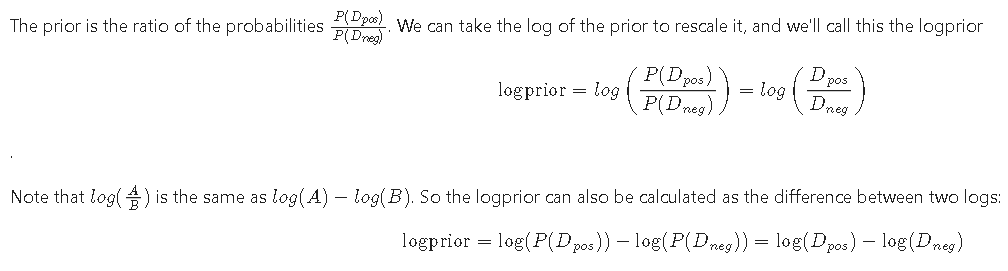

**Positive and Negative Probability of a Word**

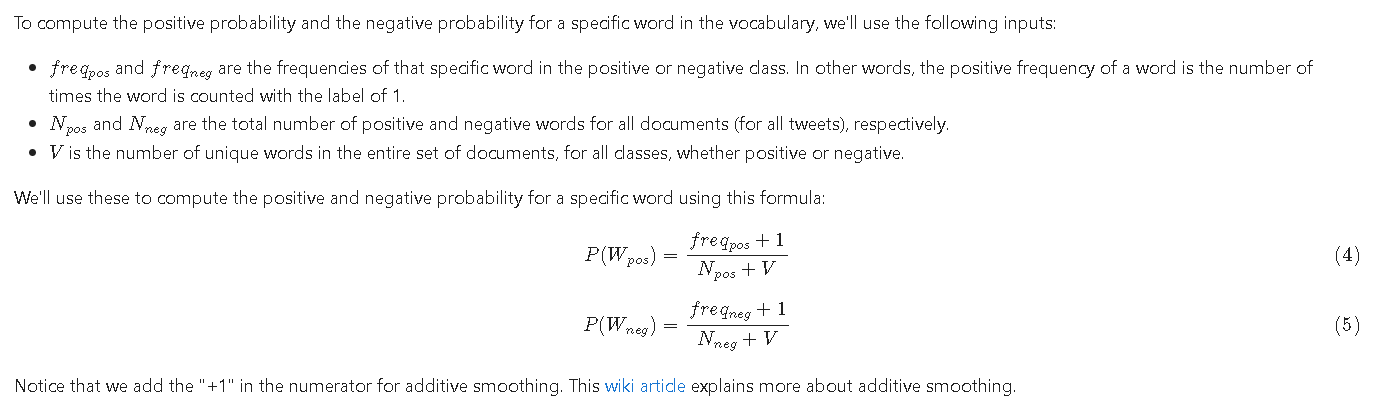

**Log likelihood**

To compute the loglikelihood of that very same word, we can implement the following equations:

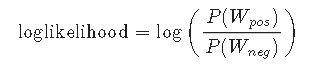

**Create freqs dictionary**

Given your count_tweets() function, you can compute a dictionary called freqs that contains all the frequencies.
In this freqs dictionary, the key is the tuple (word, label)
The value is the number of times it has appeared.
We will use this dictionary in several parts of this assignment.

In [21]:
# Build the freqs dictionary for later uses

freqs = count_tweets({}, train_x, train_y)

#print(freqs)

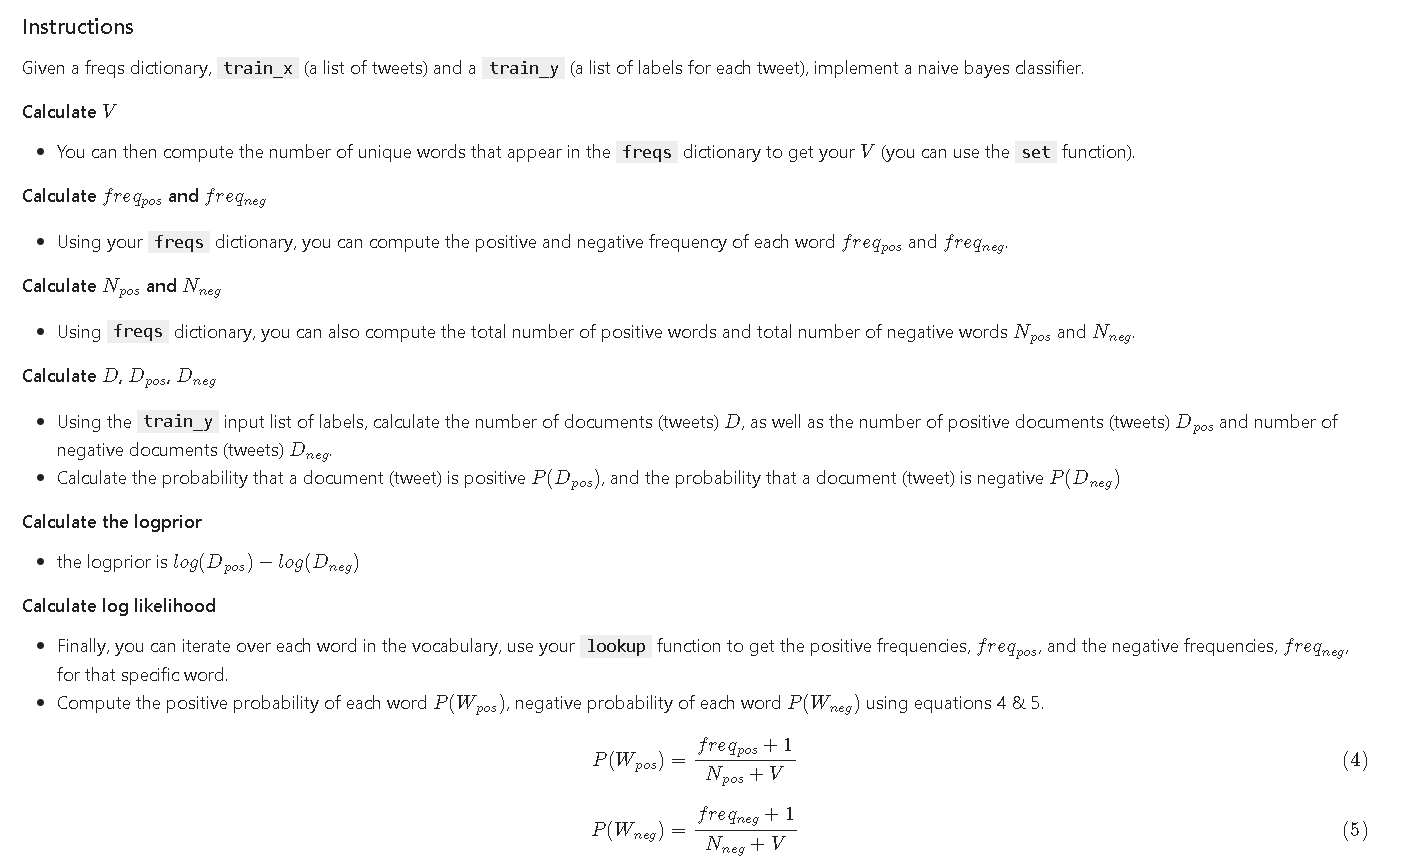

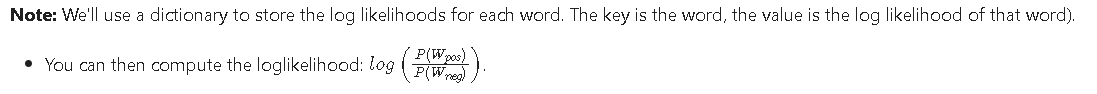

In [ ]:
# UNQ_C2 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)